In [ ]:
import sys
import numpy as np
import pandas as pd
from agents.rl_drone import RLAgent
from agents.drone_sim_env import drone_sim

env = drone_sim()
agent = RLAgent(env)
ENV_NAME = 'drone'
training_history=agent.agent.fit(env, nb_steps=100000, visualize=True, verbose=1, nb_max_episode_steps=10)

#After training is done, we save the final weights.
agent.agent.save_weights('ddpg_{}_weights.h5f'.format(ENV_NAME), overwrite=True)
#agent.agent.load_weights('ddpg_{}_weights.h5f'.format(ENV_NAME))

# Finally, evaluate our algorithm for 5 episodes.


Using TensorFlow backend.


[ 16.532202 -34.864223]
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                48        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
______________________________________________

In [3]:


#After training is done, we save the final weights.

agent.agent.load_weights('ddpg_{}_weights.h5f'.format(ENV_NAME))
agent.agent.test(env, nb_episodes=50, visualize=True, verbose=1, nb_max_episode_steps=10,start_step_policy=1)

Testing for 50 episodes ...
Episode 1: reward: 149.398, steps: 10
Episode 2: reward: 93.422, steps: 10
Episode 3: reward: 233.816, steps: 10
Episode 4: reward: 39.429, steps: 10
Episode 5: reward: -58.638, steps: 10
Episode 6: reward: 171.430, steps: 10
Episode 7: reward: 182.576, steps: 10
Episode 8: reward: -25.067, steps: 10
Episode 9: reward: 45.733, steps: 10
Episode 10: reward: 201.953, steps: 10
Episode 11: reward: -179.129, steps: 10
Episode 12: reward: -242.602, steps: 5
Episode 13: reward: 158.046, steps: 10
Episode 14: reward: 110.120, steps: 10
Episode 15: reward: -67.470, steps: 10
Episode 16: reward: -4.717, steps: 10
Episode 17: reward: -4.453, steps: 8
Episode 18: reward: 50.058, steps: 10
Episode 19: reward: 149.485, steps: 10
Episode 20: reward: -89.201, steps: 10
Episode 21: reward: 201.418, steps: 10
Episode 22: reward: -108.106, steps: 10
Episode 23: reward: 23.738, steps: 5
Episode 24: reward: 142.635, steps: 10
Episode 25: reward: 138.397, steps: 10
Episode 26: r

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

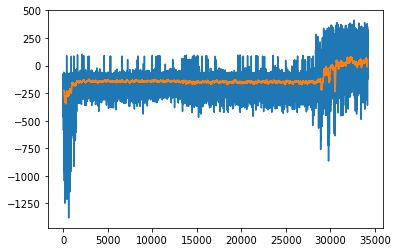

In [5]:
import matplotlib.pyplot as plt
df=pd.DataFrame()
df = pd.DataFrame(columns=['raw','MA'])
df['raw'] = training_history.history['episode_reward']
df['MA']= df.rolling(window=100).mean()
plt.plot(df)
